## Traffic Sign Classification - Multi-class Classification

In [ ]:
!pip install -q kaggle

In [9]:
# The Kaggle api expects the file to be in ~/.kaggle
!mkdir -p ~/.kaggle

#Download the kaggle api key and put it in your project folder, I am using Anaconda
#!cp kaggle.json ~/.kaggle/


The syntax of the command is incorrect.


The syntax of the command is incorrect.


'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [31]:
pwd

'D:\\Personal Projects\\Traffic Sign Classification'

In [11]:
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

D:\Personal Projects\Traffic Sign Classification\traffic_sign_dataset


In [13]:
# Searching for dataset
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          76916        931  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           9838        243  1.0              
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            351          8  0.75             
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

In [14]:
# Downloading dataset and coming out of directory
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign  
%cd ..


D:\Personal Projects\Traffic Sign Classification



  0%|          | 0.00/612M [00:00<?, ?B/s]
  0%|          | 1.00M/612M [00:00<01:03, 10.0MB/s]
  1%|          | 5.00M/612M [00:00<00:29, 21.9MB/s]
  1%|1         | 9.00M/612M [00:00<00:22, 28.5MB/s]
  2%|1         | 12.0M/612M [00:00<00:41, 15.1MB/s]
  3%|2         | 16.0M/612M [00:00<00:32, 19.3MB/s]
  3%|3         | 20.0M/612M [00:01<00:27, 22.2MB/s]
  4%|3         | 23.0M/612M [00:01<00:26, 23.3MB/s]
  4%|4         | 27.0M/612M [00:01<00:24, 25.4MB/s]
  5%|4         | 30.0M/612M [00:01<00:22, 26.7MB/s]
  5%|5         | 33.0M/612M [00:01<00:23, 25.6MB/s]
  6%|6         | 37.0M/612M [00:01<00:21, 28.2MB/s]
  7%|6         | 41.0M/612M [00:01<00:20, 29.9MB/s]
  7%|7         | 45.0M/612M [00:01<00:18, 31.3MB/s]
  8%|8         | 49.0M/612M [00:01<00:17, 33.4MB/s]
  9%|8         | 53.0M/612M [00:02<00:23, 24.7MB/s]
  9%|9         | 57.0M/612M [00:02<00:21, 26.6MB/s]
 10%|9         | 61.0M/612M [00:02<00:20, 28.5MB/s]
 10%|#         | 64.0M/612M [00:02<00:20, 28.5MB/s]
 11%|#         | 67.

 99%|#########8| 604M/612M [00:22<00:00, 29.6MB/s]
 99%|#########9| 607M/612M [00:22<00:00, 25.4MB/s]
100%|#########9| 610M/612M [00:22<00:00, 25.8MB/s]
100%|##########| 612M/612M [00:22<00:00, 28.4MB/s]


In [24]:
from zipfile import ZipFile

**Checking the present working directory before extracting the file**

In [32]:
pwd

'D:\\Personal Projects\\Traffic Sign Classification'

## Unzipping the files

In [34]:
#Now Unzipping the file
#unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
zip=ZipFile("traffic_sign_dataset/gtsrb-german-traffic-sign.zip")
zip.extractall("D:\\Personal Projects\\Traffic Sign Classification\\traffic_sign_dataset")

In [35]:
zip.close()

## Importing the libraries

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
import os
import seaborn as sns

In [113]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Image Preprocessing

In [39]:
os.listdir()

['.ipynb_checkpoints',
 'kaggle.json',
 'Traffic_Sign_Classification.ipynb',
 'traffic_sign_dataset',
 'Untitled.ipynb']

In [132]:
my_data_dir="D:\\Personal Projects\\Traffic Sign Classification\\traffic_sign_dataset"

In [133]:
os.listdir(my_data_dir)

['gtsrb-german-traffic-sign.zip',
 'Meta',
 'Meta.csv',
 'Test',
 'Test.csv',
 'Train',
 'Train.csv']

In [134]:
test_path=my_data_dir+ "\\Test\\"
train_path=my_data_dir+ "\\Train\\"

In [135]:
os.listdir(test_path)

['00000.png',
 '00001.png',
 '00002.png',
 '00003.png',
 '00004.png',
 '00005.png',
 '00006.png',
 '00007.png',
 '00008.png',
 '00009.png',
 '00010.png',
 '00011.png',
 '00012.png',
 '00013.png',
 '00014.png',
 '00015.png',
 '00016.png',
 '00017.png',
 '00018.png',
 '00019.png',
 '00020.png',
 '00021.png',
 '00022.png',
 '00023.png',
 '00024.png',
 '00025.png',
 '00026.png',
 '00027.png',
 '00028.png',
 '00029.png',
 '00030.png',
 '00031.png',
 '00032.png',
 '00033.png',
 '00034.png',
 '00035.png',
 '00036.png',
 '00037.png',
 '00038.png',
 '00039.png',
 '00040.png',
 '00041.png',
 '00042.png',
 '00043.png',
 '00044.png',
 '00045.png',
 '00046.png',
 '00047.png',
 '00048.png',
 '00049.png',
 '00050.png',
 '00051.png',
 '00052.png',
 '00053.png',
 '00054.png',
 '00055.png',
 '00056.png',
 '00057.png',
 '00058.png',
 '00059.png',
 '00060.png',
 '00061.png',
 '00062.png',
 '00063.png',
 '00064.png',
 '00065.png',
 '00066.png',
 '00067.png',
 '00068.png',
 '00069.png',
 '00070.png',
 '0007

In [136]:
os.listdir(train_path)

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '5',
 '6',
 '7',
 '8',
 '9']

In [137]:
os.listdir(train_path+"0")[0]

'00000_00000_00000.png'

In [138]:
class0_img1=train_path+"0\\"+'00000_00000_00000.png'

In [139]:
img=imread(class0_img1)

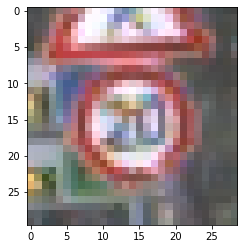

In [140]:
plt.imshow(img)

In [141]:
img.shape

(30, 29, 3)

**Now we have to make the image of different classes of same size**

In [142]:
len(os.listdir(train_path))

43

**There are a total of 43 different traffic signs in this particular dataset**

In [143]:
dim1=[]
dim2=[]

for i in range(0,43):
    labels="traffic_sign_dataset/Train"+'/{0}'.format(i)
    image_path=os.listdir(labels)
    for x in image_path:
        img=imread(labels+'/'+x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])


In [144]:
#Checking the mean of dimension 1 and dimension 2 so that we can generalize over all the images
print("Dim1 :",np.mean(dim1))
print("Dim2 :",np.mean(dim2))

Dim1 : 50.328929582493814
Dim2 : 50.83587951745773


**From the above, we can infer that we should have an average image size of (50,50,3)**

In [145]:
image_shape=(50,50,3)

## Preparing the data for the model

There is too much data to be passed in one flow so we have to pass the data in batches through built-in functions in Keras.

In [208]:
#defining a function that will scale images
from PIL import Image

def scaling(images, path):
    images = []

    image_path = images
    
    for x in image_path:
        img = Image.open(path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

In [209]:
# Now we will reshape the images to (50,50)
images = []
label_id = []
l=[]

for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [211]:
#Converting the list to array and rescaling the images so that value ranges from 0 to 1.
images=np.array(images)
images=images/255

In [212]:
images

array([[[[0.29019608, 0.30588235, 0.31372549],
         [0.28627451, 0.30196078, 0.30980392],
         [0.29019608, 0.29803922, 0.30588235],
         ...,
         [0.25098039, 0.26666667, 0.2627451 ],
         [0.25490196, 0.25882353, 0.25490196],
         [0.25490196, 0.25882353, 0.25490196]],

        [[0.30588235, 0.31372549, 0.32156863],
         [0.30196078, 0.30980392, 0.31764706],
         [0.29803922, 0.30196078, 0.30980392],
         ...,
         [0.27058824, 0.28235294, 0.27843137],
         [0.27843137, 0.27843137, 0.2745098 ],
         [0.27843137, 0.28235294, 0.2745098 ]],

        [[0.3254902 , 0.32941176, 0.3372549 ],
         [0.32156863, 0.32156863, 0.33333333],
         [0.31372549, 0.31372549, 0.32156863],
         ...,
         [0.29803922, 0.30588235, 0.29411765],
         [0.30980392, 0.30980392, 0.30196078],
         [0.31372549, 0.31372549, 0.30588235]],

        ...,

        [[0.35686275, 0.37254902, 0.38823529],
         [0.36078431, 0.37647059, 0.39607843]

In [215]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [216]:
images.shape

(39209, 50, 50, 3)

In [226]:
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [227]:
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical

In [228]:
#Creating train-test split
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [230]:
x_train.shape

(31367, 50, 50, 3)

In [229]:
#converting the output columns to categorical type since it's a classification problem 
y_train_cat=to_categorical(y_train)
y_val_cat=to_categorical(y_val)

In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [248]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=x_train.shape[1:], activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(43))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [249]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 48, 48, 64)        1792      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 9, 9, 64)        

## Early Stopping

In [250]:
from tensorflow.keras.callbacks import EarlyStopping

In [251]:
early_stop=EarlyStopping(monitor="val_loss",patience=2)

## Training the model

In [252]:
results = model.fit(x_train,y_train,epochs=10,batch_size=100,validation_data=(x_val,y_val),callbacks=[early_stop])

Epoch 1/10
314/314 [==============================] - 82s 261ms/step - loss: 2.8406 - accuracy: 0.2192 - val_loss: 1.7559 - val_accuracy: 0.5046
Epoch 2/10
314/314 [==============================] - 84s 267ms/step - loss: 1.5558 - accuracy: 0.5040 - val_loss: 0.8949 - val_accuracy: 0.7651
Epoch 3/10
314/314 [==============================] - 82s 260ms/step - loss: 0.9478 - accuracy: 0.6876 - val_loss: 0.3960 - val_accuracy: 0.9044
Epoch 4/10
314/314 [==============================] - 93s 295ms/step - loss: 0.6614 - accuracy: 0.7816 - val_loss: 0.2499 - val_accuracy: 0.9379
Epoch 5/10
314/314 [==============================] - 103s 329ms/step - loss: 0.5183 - accuracy: 0.8276 - val_loss: 0.1889 - val_accuracy: 0.9587
Epoch 6/10
314/314 [==============================] - 102s 325ms/step - loss: 0.4343 - accuracy: 0.8568 - val_loss: 0.1539 - val_accuracy: 0.9666
Epoch 7/10
314/314 [==============================] - 96s 307ms/step - loss: 0.3729 - accuracy: 0.8778 - val_loss: 0.1149 - val_

In [253]:
from tensorflow.keras.models import load_model
model.save('traffic_sign_detector.h5')

In [254]:
evaluation = pd.DataFrame(model.history.history)

<AxesSubplot:>

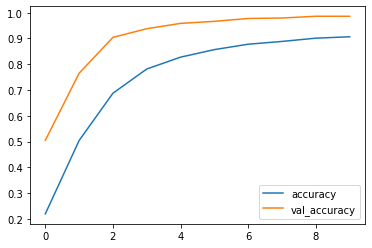

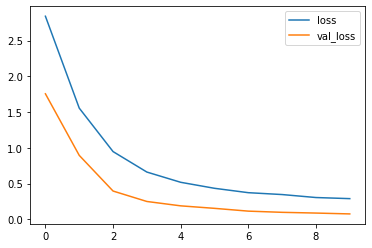

In [255]:
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

## Function for scaling test images

In [266]:
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

Our test images is not in hierarchial format required by flow_from_directory, hence we can either bring them to that format or create a function and scale them.

In [267]:
test_path = 'traffic_sign_dataset/Test'

In [268]:
#os.remove("traffic_sign_dataset/Test/GT-final_test.csv")

In [269]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [270]:
test_images

array([[[[0.45098039, 0.54117647, 0.67843137],
         [0.45490196, 0.54117647, 0.6745098 ],
         [0.45490196, 0.5372549 , 0.6627451 ],
         ...,
         [0.34117647, 0.43529412, 0.53333333],
         [0.3254902 , 0.40784314, 0.50588235],
         [0.2627451 , 0.3372549 , 0.43137255]],

        [[0.4627451 , 0.56078431, 0.69803922],
         [0.45490196, 0.54901961, 0.69411765],
         [0.45098039, 0.54117647, 0.68235294],
         ...,
         [0.47058824, 0.55686275, 0.6745098 ],
         [0.47058824, 0.54509804, 0.65882353],
         [0.4627451 , 0.5372549 , 0.65490196]],

        [[0.45490196, 0.56078431, 0.69411765],
         [0.44313725, 0.54509804, 0.68235294],
         [0.45490196, 0.55294118, 0.68235294],
         ...,
         [0.4745098 , 0.55686275, 0.68627451],
         [0.47058824, 0.54901961, 0.67058824],
         [0.4745098 , 0.54901961, 0.67843137]],

        ...,

        [[0.45490196, 0.53333333, 0.65490196],
         [0.45882353, 0.53333333, 0.65098039]

In [271]:
pwd

'D:\\Personal Projects\\Traffic Sign Classification'

In [272]:
test=pd.read_csv("traffic_sign_dataset/Test.csv")
y_test=test["ClassId"].values

In [273]:
y_test

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

## Making Predictions

In [274]:
y_pred=model.predict_classes(test_images)

In [275]:
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

In [276]:
os.listdir(test_path)

['00000.png',
 '00001.png',
 '00002.png',
 '00003.png',
 '00004.png',
 '00005.png',
 '00006.png',
 '00007.png',
 '00008.png',
 '00009.png',
 '00010.png',
 '00011.png',
 '00012.png',
 '00013.png',
 '00014.png',
 '00015.png',
 '00016.png',
 '00017.png',
 '00018.png',
 '00019.png',
 '00020.png',
 '00021.png',
 '00022.png',
 '00023.png',
 '00024.png',
 '00025.png',
 '00026.png',
 '00027.png',
 '00028.png',
 '00029.png',
 '00030.png',
 '00031.png',
 '00032.png',
 '00033.png',
 '00034.png',
 '00035.png',
 '00036.png',
 '00037.png',
 '00038.png',
 '00039.png',
 '00040.png',
 '00041.png',
 '00042.png',
 '00043.png',
 '00044.png',
 '00045.png',
 '00046.png',
 '00047.png',
 '00048.png',
 '00049.png',
 '00050.png',
 '00051.png',
 '00052.png',
 '00053.png',
 '00054.png',
 '00055.png',
 '00056.png',
 '00057.png',
 '00058.png',
 '00059.png',
 '00060.png',
 '00061.png',
 '00062.png',
 '00063.png',
 '00064.png',
 '00065.png',
 '00066.png',
 '00067.png',
 '00068.png',
 '00069.png',
 '00070.png',
 '0007

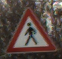

In [277]:
#checking the test image
img=Image.open(test_path+"/10000.png")
img

In [278]:
print("Actual Label : ",all_lables[y_test[900]])

Actual Label :  Right-of-way at the next intersection


In [279]:
print("Prediction:",all_lables[y_pred[900]])

Prediction: Right-of-way at the next intersection


In [280]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [281]:
print(confusion_matrix(y_test,y_pred))

[[ 59   1   0 ...   0   0   0]
 [  0 702   6 ...   0   0   0]
 [  0   0 739 ...   0   0   0]
 ...
 [  0   0   0 ...  88   0   0]
 [  0   0   0 ...   0  47   0]
 [  0   0   0 ...   0   0  87]]


In [282]:
print(accuracy_score(y_test,y_pred))

0.9556611243072051
